In [2]:
import pandas as pd
import gzip
# import torch
import re
from pathlib import Path
import json
import numpy as np
from datetime import datetime, timezone, timedelta
from dateutil.relativedelta import relativedelta
import os
from wordcloud import STOPWORDS, WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [13]:
path_1 = '../Data/yt_results_archive_clean.jsonl'
path_2 = '../Data/yt_results_uniq_clean.jsonl'

In [17]:
if os.path.isfile(path_1):
    df_1 = pd.read_json(path_1, lines=True)

df_1
print(len(df_1),len(pd.unique(df_1['video_url'])))

5341 3179


In [22]:
df_1.columns

Index(['video_id', 'video_url', 'scraped_at', 'title', 'description',
       'channel_title', 'published_at', 'views', 'likes', 'comment_count',
       'duration_seconds', 'keyword_relevance', '_iteration', '_archived_at'],
      dtype='object')

In [16]:
if os.path.isfile(path_2):
    df_2 = pd.read_json(path_2, lines=True)
    
print(len(df_2),len(pd.unique(df_2['video_url'])))

3119 3119


In [24]:
df_2.columns == df_1.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [21]:
df_1.isna().sum()

video_id             0
video_url            0
scraped_at           0
title                0
description          0
channel_title        0
published_at         0
views                0
likes                0
comment_count        0
duration_seconds     0
keyword_relevance    0
_iteration           0
_archived_at         0
dtype: int64

In [25]:
df_2.isna().sum()

video_id             0
video_url            0
scraped_at           0
title                0
description          0
channel_title        0
published_at         0
views                0
likes                0
comment_count        0
duration_seconds     0
keyword_relevance    0
_iteration           0
_archived_at         0
dtype: int64

In [68]:
df = pd.concat([df_1, df_2], ignore_index=True)

In [69]:
df = df.drop_duplicates(subset='video_url', ignore_index=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           3179 non-null   object        
 1   video_url          3179 non-null   object        
 2   scraped_at         3179 non-null   datetime64[ns]
 3   title              3179 non-null   object        
 4   description        3179 non-null   object        
 5   channel_title      3179 non-null   object        
 6   published_at       3179 non-null   datetime64[ns]
 7   views              3179 non-null   int64         
 8   likes              3179 non-null   int64         
 9   comment_count      3179 non-null   int64         
 10  duration_seconds   3179 non-null   int64         
 11  keyword_relevance  3179 non-null   object        
 12  _iteration         3179 non-null   int64         
 13  _archived_at       3179 non-null   datetime64[ns]
dtypes: datet

In [71]:
df = df[['video_url','title','description','published_at','views','likes','comment_count']]
df

video_url  \
0     https://www.youtube.com/watch?v=tvBXacseqvo   
1     https://www.youtube.com/watch?v=1NzKGtHhGUI   
2     https://www.youtube.com/watch?v=rC03XPvcy9M   
3     https://www.youtube.com/watch?v=MWw76aQHHR0   
4     https://www.youtube.com/watch?v=cBAoh1q_5u8   
...                                           ...   
3174  https://www.youtube.com/watch?v=7SghCZZwh0s   
3175  https://www.youtube.com/watch?v=u1YhpsuxODY   
3176  https://www.youtube.com/watch?v=XrrjwyA3d58   
3177  https://www.youtube.com/watch?v=EleiQ6Y2F2U   
3178  https://www.youtube.com/watch?v=IP9t6JuJL2c   

                                                                                                 title  \
0     Police chief reacts to video of ICE dragging woman from her car #shorts                            
1     ICE protests push back against local immigration raids                                             
2     Minnesota residents push back against ICE immigration raids | DW News                              
3     Vance Says ICE Agents Not Racially Profiling in Minnesota                                          
4     Shots fired during immigration raid after suspect tried to ram agents with car: DHS                
...                                                                                   ...                
3174  'Win for Trump': More migrants self-deporting amid ICE crackdown                                   
3175  ICE Raids: Fox News reporter witnesses mass deportation efforts                                    
3176  Trump delays deportation of Korean workers after ICE raid at Hyundai-LG battery plant in Georgia   
3177  ICE agents take illegal migrants out of factory                                                    
3178  ICE Agents RAID Phoenix Airport | 1,000+ Migrants DEPORTED In One Day!                             

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            description  \
0     “It pisses me off to see that, to see men doing that to a woman who's disabled,” Minneapolis Police Chief Brian O’Hara says after watching a video of a U.S. citizen being dragged from her car by ICE officers. He points out that he didn’t know what happened when officers first approached the car. #minneap

<Axes: xlabel='published_at'>

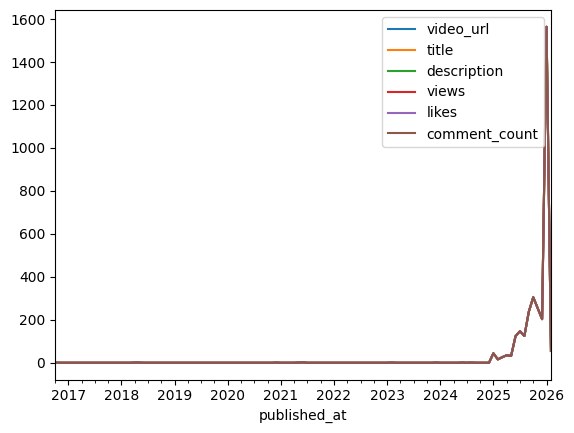

In [72]:
grouped = df.groupby(pd.Grouper(key='published_at',freq='ME')).count()
grouped.plot()


In [73]:
df.groupby(pd.Grouper(key='published_at',freq='ME')).count()

video_url  title  description  views  likes  comment_count
published_at                                                            
2016-10-31    1          1      1            1      1      1            
2016-11-30    0          0      0            0      0      0            
2016-12-31    0          0      0            0      0      0            
2017-01-31    0          0      0            0      0      0            
2017-02-28    0          0      0            0      0      0            
...          ..         ..     ..           ..     ..     ..            
2025-10-31    305        305    305          305    305    305          
2025-11-30    254        254    254          254    254    254          
2025-12-31    203        203    203          203    203    203          
2026-01-31    1564       1564   1564         1564   1564   1564         
2026-02-28    55         55     55           55     55     55           

[113 rows x 6 columns]

In [74]:
df[df['published_at']< datetime(2025,1,20)]

video_url  \
88   https://www.youtube.com/watch?v=l8dA9QNJZ8A   
289  https://www.youtube.com/watch?v=JcPZ344NYwg   
324  https://www.youtube.com/watch?v=Ibk8iythdrw   
330  https://www.youtube.com/watch?v=5oTx6Ih5rLA   
360  https://www.youtube.com/watch?v=hsjbB3l0CmQ   
387  https://www.youtube.com/watch?v=_rWdFljytLo   
390  https://www.youtube.com/watch?v=iRUFgwy8SlY   
418  https://www.youtube.com/watch?v=6ZhyEW5fww4   
429  https://www.youtube.com/watch?v=C-0bURq6wBo   
431  https://www.youtube.com/watch?v=79pQmp_Wtns   
466  https://www.youtube.com/watch?v=EHp5Ux5cex4   
536  https://www.youtube.com/watch?v=qrOlTNQohJk   

                                                                                            title  \
88   Mural inspires detainees at Prince George's County youth detention center                      
289  BORDER PATROL VS. ICE - WHAT'S THE DIFFERENCE?                                                 
324  Video released showing large fight inside Portage County Juvenile Detention Center             
330  US BORDER PATROL SPECIAL OPERATIONS GROUP (BORTAC/BORSTAR)                                     
360  Nightshift At The Las Vegas Detention Center, A Career As A Corrections Officer In Las Vegas   
387  PIX11 gets exclusive tour inside ICE detention center                                          
390  🎥 Differences: CBP Officers vs. Border Patrol Agents 2026                                      
418  Teenager's First Hours in Juvenile Detention                                                   
429  Inside Juvenile Detention                                                                      
431  24 HOURS INSIDE A JUVENILE DETENTION CENTER                                                    
466  The Polygraph Exam (Updated Jan 2025) - CBP Hiring Process | CBP                               
536  The Craziest American Border Discoveries | Contraband: Seized at the Border | Discovery        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [76]:
df = df.drop(index= df[df['published_at'] < datetime(2025,1,20)].index)

In [77]:
df.groupby(pd.Grouper(key='published_at',freq='ME')).count()

video_url  title  description  views  likes  comment_count
published_at                                                            
2025-01-31    43         43     43           43     43     43           
2025-02-28    16         16     16           16     16     16           
2025-03-31    26         26     26           26     26     26           
2025-04-30    35         35     35           35     35     35           
2025-05-31    32         32     32           32     32     32           
2025-06-30    124        124    124          124    124    124          
2025-07-31    147        147    147          147    147    147          
2025-08-31    125        125    125          125    125    125          
2025-09-30    238        238    238          238    238    238          
2025-10-31    305        305    305          305    305    305          
2025-11-30    254        254    254          254    254    254          
2025-12-31    203        203    203          203    203    203          
2026-01-31    1564       1564   1564         1564   1564   1564         
2026-02-28    55         55     55           55     55     55

In [82]:
df[df['published_at'] > datetime(2026,1,21)].sort_values(by='published_at')

video_url  \
220  https://www.youtube.com/watch?v=sm2WYQfwlVQ   
95   https://www.youtube.com/watch?v=7ohX3FyQuEw   
276  https://www.youtube.com/watch?v=uSJICEdHAX0   
87   https://www.youtube.com/watch?v=6_z_ijuVLW0   
67   https://www.youtube.com/watch?v=rsD27pSy7Qk   
..                                           ...   
782  https://www.youtube.com/watch?v=YDfnFaCYZRM   
826  https://www.youtube.com/watch?v=g45c5Vem6g0   
717  https://www.youtube.com/watch?v=4NZPnxtVLjs   
706  https://www.youtube.com/watch?v=2n8QNvl4rrc   
688  https://www.youtube.com/watch?v=arhQZufJ7GE   

                                                                                                  title  \
220  FULL PRESSER: Senators speak after touring California City ICE detention center                      
95   Sen. Schiff and Padilla visit ICE Detention Facility in California City                              
276  Watching a Minnesota ICE protest video at 3 am. #badnapoleon                                         
87   California senators raise concerns after touring Cal City ICE detention center                       
67   EXCLUSIVE: Fox gets candid view of ‘CATCH OF THE DAY’ Maine immigration raid                         
..                                                                            ...                         
782  Surveillance video shows truck ramming Border Patrol car before Portland shooting                    
826  Is ICE planning on building a detention center in SA?                                                
717  Fullerton police chief denies claims his officers helped federal immigration enforcement operation   
706  Chula Vista City Council votes to condemn federal immigration enforcement actions                    
688  Es balok jernih #es #faktaunik                                                                       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [83]:
df.drop(index=df[df['published_at'] > datetime(2026,1,20)].index)

video_url  \
0     https://www.youtube.com/watch?v=tvBXacseqvo   
1     https://www.youtube.com/watch?v=1NzKGtHhGUI   
5     https://www.youtube.com/watch?v=O7wXXnElpb0   
8     https://www.youtube.com/watch?v=EjplRxsjUCo   
10    https://www.youtube.com/watch?v=JddcoSUWTH0   
...                                           ...   
3174  https://www.youtube.com/watch?v=7SghCZZwh0s   
3175  https://www.youtube.com/watch?v=u1YhpsuxODY   
3176  https://www.youtube.com/watch?v=XrrjwyA3d58   
3177  https://www.youtube.com/watch?v=EleiQ6Y2F2U   
3178  https://www.youtube.com/watch?v=IP9t6JuJL2c   

                                                                                                 title  \
0     Police chief reacts to video of ICE dragging woman from her car #shorts                            
1     ICE protests push back against local immigration raids                                             
5     How immigration raid on Chicago apartments unfolded | BBC News                                     
8     Border Patrol arrests more than 250 people in Charlotte immigration operation                      
10    What to know about U.S. Immigration and Customs Enforcement (ICE)                                  
...                                                                 ...                                  
3174  'Win for Trump': More migrants self-deporting amid ICE crackdown                                   
3175  ICE Raids: Fox News reporter witnesses mass deportation efforts                                    
3176  Trump delays deportation of Korean workers after ICE raid at Hyundai-LG battery plant in Georgia   
3177  ICE agents take illegal migrants out of factory                                                    
3178  ICE Agents RAID Phoenix Airport | 1,000+ Migrants DEPORTED In One Day!                             

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            description  \
0     “It pisses me off to see that, to see men doing that to a woman who's disabled,” Minneapolis Police Chief Brian O’Hara says after watching a video of a U.S. citizen being dragged from her car by ICE officers. He points out that he didn’t know what happened when officers first approached the car. #minneap

<Axes: xlabel='published_at'>

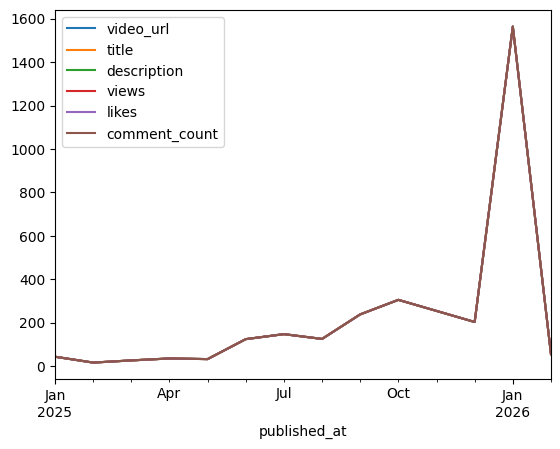

In [86]:
grouped = df.groupby(pd.Grouper(key='published_at',freq='ME')).count()
grouped.plot()

In [90]:
df

video_url  \
0     https://www.youtube.com/watch?v=tvBXacseqvo   
1     https://www.youtube.com/watch?v=1NzKGtHhGUI   
2     https://www.youtube.com/watch?v=rC03XPvcy9M   
3     https://www.youtube.com/watch?v=MWw76aQHHR0   
4     https://www.youtube.com/watch?v=cBAoh1q_5u8   
...                                           ...   
3174  https://www.youtube.com/watch?v=7SghCZZwh0s   
3175  https://www.youtube.com/watch?v=u1YhpsuxODY   
3176  https://www.youtube.com/watch?v=XrrjwyA3d58   
3177  https://www.youtube.com/watch?v=EleiQ6Y2F2U   
3178  https://www.youtube.com/watch?v=IP9t6JuJL2c   

                                                                                                 title  \
0     Police chief reacts to video of ICE dragging woman from her car #shorts                            
1     ICE protests push back against local immigration raids                                             
2     Minnesota residents push back against ICE immigration raids | DW News                              
3     Vance Says ICE Agents Not Racially Profiling in Minnesota                                          
4     Shots fired during immigration raid after suspect tried to ram agents with car: DHS                
...                                                                                   ...                
3174  'Win for Trump': More migrants self-deporting amid ICE crackdown                                   
3175  ICE Raids: Fox News reporter witnesses mass deportation efforts                                    
3176  Trump delays deportation of Korean workers after ICE raid at Hyundai-LG battery plant in Georgia   
3177  ICE agents take illegal migrants out of factory                                                    
3178  ICE Agents RAID Phoenix Airport | 1,000+ Migrants DEPORTED In One Day!                             

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            description  \
0     “It pisses me off to see that, to see men doing that to a woman who's disabled,” Minneapolis Police Chief Brian O’Hara says after watching a video of a U.S. citizen being dragged from her car by ICE officers. He points out that he didn’t know what happened when officers first approached the car. #minneap

In [91]:
df = df.reset_index(drop=True)

In [93]:
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from bertopic.representation import KeyBERTInspired

In [96]:
df['all_text'] = df['title'] + ' ' + df['description']

In [97]:
df

video_url  \
0     https://www.youtube.com/watch?v=tvBXacseqvo   
1     https://www.youtube.com/watch?v=1NzKGtHhGUI   
2     https://www.youtube.com/watch?v=rC03XPvcy9M   
3     https://www.youtube.com/watch?v=MWw76aQHHR0   
4     https://www.youtube.com/watch?v=cBAoh1q_5u8   
...                                           ...   
3162  https://www.youtube.com/watch?v=7SghCZZwh0s   
3163  https://www.youtube.com/watch?v=u1YhpsuxODY   
3164  https://www.youtube.com/watch?v=XrrjwyA3d58   
3165  https://www.youtube.com/watch?v=EleiQ6Y2F2U   
3166  https://www.youtube.com/watch?v=IP9t6JuJL2c   

                                                                                                 title  \
0     Police chief reacts to video of ICE dragging woman from her car #shorts                            
1     ICE protests push back against local immigration raids                                             
2     Minnesota residents push back against ICE immigration raids | DW News                              
3     Vance Says ICE Agents Not Racially Profiling in Minnesota                                          
4     Shots fired during immigration raid after suspect tried to ram agents with car: DHS                
...                                                                                   ...                
3162  'Win for Trump': More migrants self-deporting amid ICE crackdown                                   
3163  ICE Raids: Fox News reporter witnesses mass deportation efforts                                    
3164  Trump delays deportation of Korean workers after ICE raid at Hyundai-LG battery plant in Georgia   
3165  ICE agents take illegal migrants out of factory                                                    
3166  ICE Agents RAID Phoenix Airport | 1,000+ Migrants DEPORTED In One Day!                             

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            description  \
0     “It pisses me off to see that, to see men doing that to a woman who's disabled,” Minneapolis Police Chief Brian O’Hara says after watching a video of a U.S. citizen being dragged from her car by ICE officers. He points out that he didn’t know what happened when officers first approached the car. #minneap

In [98]:
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
text = df.all_text.tolist()

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     | Details
------------------------+------------+--------
embeddings.position_ids | UNEXPECTED |        

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [99]:
## Pre-Embedding 
if not os.path.isfile(os.getcwd() + '/modellen/embeddings-yt.npy'):
    print('Geen opgeslagen embeddings gevonden, zelf aanmaken:')
    embeddings = sentence_model.encode(text, show_progress_bar=True)
    
    with open(os.getcwd() + '/modellen/embeddings-yt.npy', 'wb') as f:
        np.save(f, embeddings)
else:
    print('Opgeslagen embeddings gevonden, laden:')
    embeddings = np.load(os.getcwd() + '/modellen/embeddings-yt.npy')

Geen opgeslagen embeddings gevonden, zelf aanmaken:


Batches:   0%|          | 0/99 [00:00<?, ?it/s]

In [100]:
## Setting up UMAP
umap_model = UMAP(n_neighbors=25, n_components=5, min_dist=0.05, metric='cosine', 
            random_state = 711, verbose=True)
    
## Setting up HDBSCAN 
hdbscan_model = HDBSCAN(min_cluster_size=50, min_samples=10, prediction_data=True)
    
representation_model = KeyBERTInspired()
    
topic_model = BERTopic(
    embedding_model=sentence_model, 
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    representation_model=representation_model
)

embeddings = np.load(os.getcwd() + '/modellen/embeddings-yt.npy')

topics, probs = topic_model.fit_transform(text, embeddings)

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.05, n_components=5, n_jobs=1, n_neighbors=25, random_state=711, verbose=True)
Sat Feb 21 16:40:13 2026 Construct fuzzy simplicial set
Sat Feb 21 16:40:19 2026 Finding Nearest Neighbors
Sat Feb 21 16:40:25 2026 Finished Nearest Neighbor Search
Sat Feb 21 16:40:28 2026 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Feb 21 16:40:34 2026 Finished embedding


In [101]:
topic_model.get_topic_info()

Topic  Count                                   Name  \
0 -1      17     -1_ice_newsmakers_news_investigations   
1  0      2947   0_nbcnews_cbsnews_patrol_immigration    
2  1      151    1_ice_foxnews_news_foxnewsgo            
3  2      52     2_detained_msnbc_news_enforcement       

                                                                                     Representation  \
0  [ice, newsmakers, news, investigations, minneapolis, stories, events, source, follow, minnesota]   
1  [nbcnews, cbsnews, patrol, immigration, police, news, nbc, enforcement, protesters, officers]      
2  [ice, foxnews, news, foxnewsgo, hannity, primetime, fox, baier, source, breaking]                  
3  [detained, msnbc, news, enforcement, immigration, ice, fox, officials, stories, instagram]         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

Maar drie topics, dus wat parameters veranderen. m_neigbors naar 10 gezet en min_samples naar 5. cluster_size hetzelfde, gezien dit niet geraakt wordt. min_dist is ook lager gezet.

In [120]:
## Setting up UMAP
umap_model = UMAP(n_neighbors=10, n_components=5, min_dist=0.03, metric='cosine', 
            random_state = 711, verbose=True)
    
## Setting up HDBSCAN 
hdbscan_model = HDBSCAN(min_cluster_size=50, min_samples=5, prediction_data=True)
    
representation_model = KeyBERTInspired()
    
topic_model = BERTopic(
    embedding_model=sentence_model, 
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    representation_model=representation_model
)

embeddings = np.load(os.getcwd() + '/modellen/embeddings-yt.npy')

topics, probs = topic_model.fit_transform(text, embeddings)

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.03, n_components=5, n_jobs=1, n_neighbors=10, random_state=711, verbose=True)
Sat Feb 21 17:13:06 2026 Construct fuzzy simplicial set
Sat Feb 21 17:13:13 2026 Finding Nearest Neighbors
Sat Feb 21 17:13:13 2026 Finished Nearest Neighbor Search
Sat Feb 21 17:13:13 2026 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Feb 21 17:13:16 2026 Finished embedding


In [121]:
topic_model.get_topic_info()

Topic  Count                                         Name  \
0  -1      783    -1_protests_protesters_ice_protest            
1   0      327    0_immigration_news_enforcement_protesters     
2   1      297    1_ice_nbcnews_msnbc_abcnews                   
3   2      182    2_arrests_deportation_arrest_news             
4   3      180    3_arrests_news_ice_arrest                     
5   4      179    4_ice_la_watch_instagram                      
6   5      178    5_ice_minneapolis_rickstrom_statuscoupnews    
7   6      151    6_foxnews_foxnewsgo_source_watch              
8   7      145    7_ice_protests_protesters_immigration         
9   8      144    8_immigration_enforcement_police_suspect      
10  9      141    9_news_arrests_ice_minneapolis                
11  10     139    10_protests_immigration_protest_enforcement   
12  11     89     11_ice_patrol_police_fbi                      
13  12     68     12_msnbc_news_immigration_watch               
14  13     55     13_protests_breakingnews_news_minneapolis     
15  14     55     14_reporting_ice_station_crew                 
16  15     54     15_minneapolis_immigration_homeland_patrol    

                                                                                             Representation  \
0   [protests, protesters, ice, protest, immigration, enforcement, news, detention, minneapolis, stories]     
1   [immigration, news, enforcement, protesters, officers, officer, protests, minneapolis, cbc, nicole]       
2   [ice, nbcnews, msnbc, abcnews, patrol, cbsnews, cbseveningnews, immigration, nbc, agents]                 
3   [arrests, deportation, arrest, news, arrested, police, enforcement, immigration, protests, activists]     
4   [arrests, news, ice, arrest, detained, deportations, deportation, arrested, enforcement, deported]        
5   [ice, la, watch, instagram, frozen, papa, viral, una, we, the]                                            
6   [ice, minneapolis, rickstrom, statuscoupnews, rick, coup, live, reporting, follow, statuscoup]            
7   [foxnews, foxnewsgo, source, watch, instagram, news, video, baier, fox, watched]                          
8   [ice, protests, protesters, immigration, news, officers, police, enforcement, protest, headlines]         
9   [immigration, enforcement, police, suspect, investigation, news, officers, incident, patrol, safety]      
10  [news, arrests, ice, minneapolis, cops, immigration, detained, arrest, federal, enforcement]              
11  [protests, immigration, protest, enforcement, news, detainees, follow, instagram, twitter, broadcast]     
12  [ice, patrol, police, fbi, agent, agents, border, federal, news, traffic]                                 
13  [msnbc, news, immigration, watch, ice, federal, enforcement, detained, live, trump]                       
14  [protests, breakingnews, news, minneapolis, patrol, ice, briefing, immigration, minnesota, enforcement]   
15  [reporting, ice, station, crew, section, through, cisf, ship, run, we]                                    
16  [minneapolis, immigration, homeland, patrol, ice, suspect, enforcement, minnesota, border, officers]      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

16 topics is een stuk beter. Kijkend naar de 'representation' zijn dit redelijke topics. De outliers zouden ook een plek moeten kunnen vinden. Eerst een visualisatie:

In [122]:
new_topics = topic_model.reduce_outliers(text, topics, strategy="embeddings")

In [123]:
topic_model.update_topics(text, topics=new_topics)

2026-02-21 17:15:02,693 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


In [124]:
topic_model.get_topic_info()

Topic  Count                            Name  \
0   0      505    0_the_minneapolis_and_ice        
1   1      352    1_news_cbs_com_https             
2   2      205    2_chicago_the_in_ice             
3   3      295    3_immigration_ice_and_the        
4   4      183    4_ice_cream_de_https             
5   5      240    5_https_com_www_to               
6   6      152    6_fox_foxnews_news_shows         
7   7      205    7_new_york_nypost_post           
8   8      172    8_border_the_patrol_and          
9   9      261    9_ice_the_to_in                  
10  10     192    10_detention_com_https_center    
11  11     92     11_portland_kgw_shot_border      
12  12     75     12_f24_my_hyundai_the            
13  13     90     13_bovino_border_press_patrol    
14  14     85     14_ice_use_copyright_the         
15  15     63     15_pretti_minneapolis_alex_the   

                                                                        Representation  \
0   [the, minneapolis, and, ice, of, in, to, shooting, https, on]                        
1   [news, cbs, com, https, nbc, and, nbcnews, cbsnews, to, the]                         
2   [chicago, the, in, ice, and, to, of, https, immigration, com]                        
3   [immigration, ice, and, the, to, in, of, raid, raids, deportation]                   
4   [ice, cream, de, https, en, kids, big, guy, and, la]                                 
5   [https, com, www, to, the, on, and, tyt, youtube, instagram]                         
6   [fox, foxnews, news, shows, video, www, com, the, https, brand]                      
7   [new, york, nypost, post, com, https, the, www, ice, youtube]                        
8   [border, the, patrol, and, in, of, to, on, at, cbp]                                  
9   [ice, the, to, in, agents, and, was, by, of, his]                                    
10  [detention, com, https, center, the, to, www, and, ice, in]                          
11  [portland, kgw, shot, border, the, two, shooting, patrol, people, in]                
12  [f24, my, hyundai, the, georgia, https, raid, plant, south, in]                      
13  [bovino, border, press, patrol, minneapolis, and, minnesota, in, enforcement, the]   
14  [ice, use, copyright, the, fair, this, of, in, for, and]                             
15  [pretti, minneapolis, alex, the, shooting, in, to, and, patrol, shot]                

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In de visualisatie kan je zien dat er veel topics overlappen, linksboven. Ook is duidelijjk te zijn welke drie topics er eerder waren gekregen.

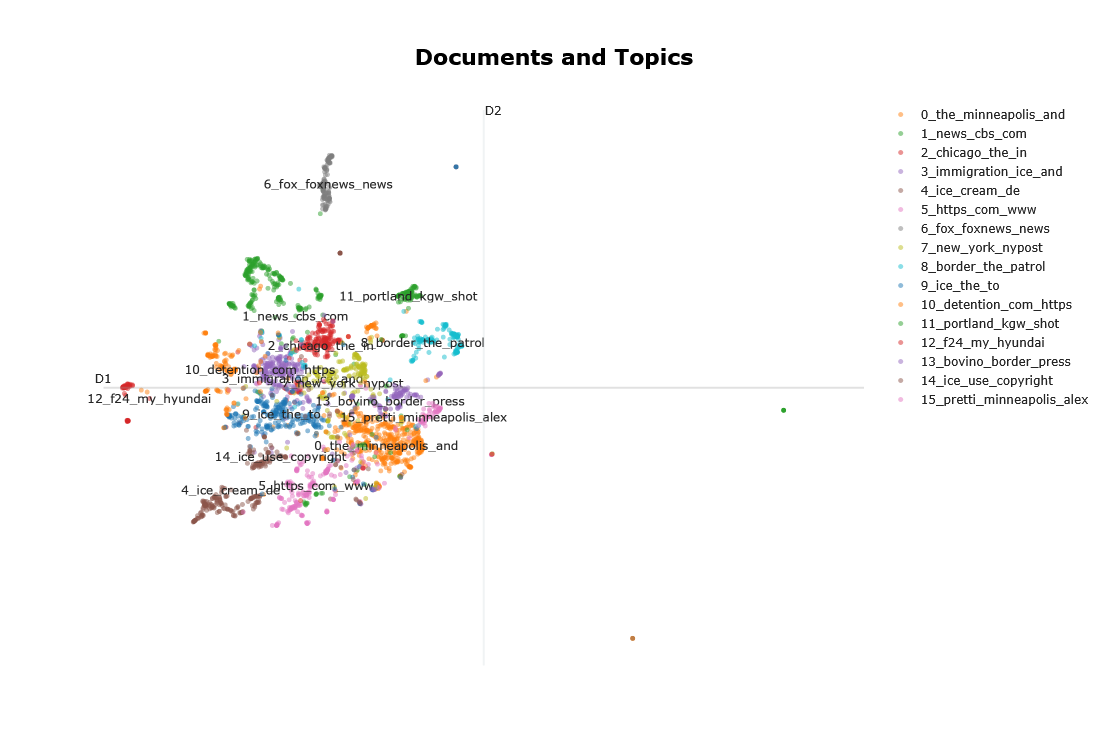

In [125]:
topic_model.visualize_documents(text, embeddings=embeddings)

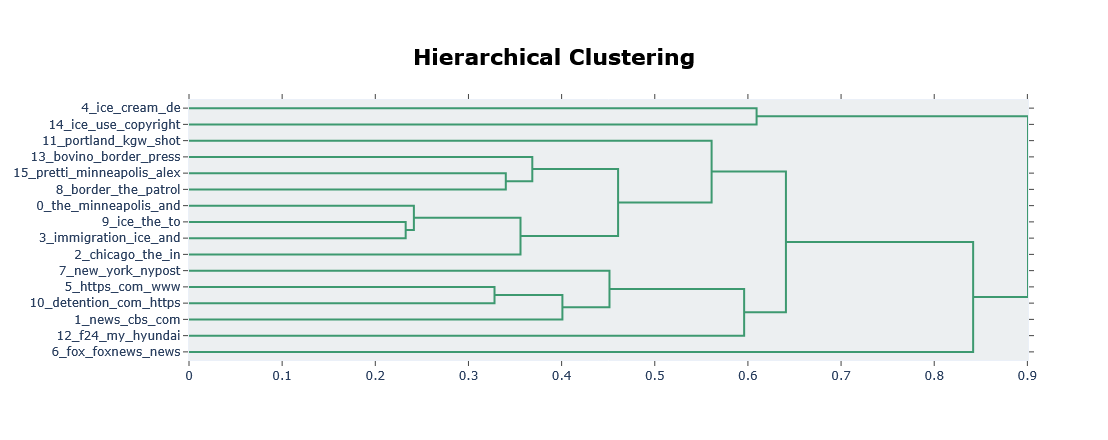

In [126]:
topic_model.visualize_hierarchy()

In [127]:
topic_model.save(
    path=os.getcwd() + '/modellen/topic-model-yt',
    serialization="safetensors",
    save_ctfidf=True,
    save_embedding_model="all-MiniLM-L6-v2"
)

In [129]:
df["Topic"] = new_topics
df.head()

video_url  \
0  https://www.youtube.com/watch?v=tvBXacseqvo   
1  https://www.youtube.com/watch?v=1NzKGtHhGUI   
2  https://www.youtube.com/watch?v=rC03XPvcy9M   
3  https://www.youtube.com/watch?v=MWw76aQHHR0   
4  https://www.youtube.com/watch?v=cBAoh1q_5u8   

                                                                                 title  \
0  Police chief reacts to video of ICE dragging woman from her car #shorts               
1  ICE protests push back against local immigration raids                                
2  Minnesota residents push back against ICE immigration raids | DW News                 
3  Vance Says ICE Agents Not Racially Profiling in Minnesota                             
4  Shots fired during immigration raid after suspect tried to ram agents with car: DHS   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      description  \
0  “It pisses me off to see that, to see men doing that to a woman who's disabled,” Minneapolis Police Chief Brian O’Hara says after watching a video of a U.S. citizen being dragged from her car by ICE officers. He points out that he didn’t know what happened when officers first approached the car. #minneapolis #ICE #lawenforcement                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1  Protesters gathered in Highland Parl after recent immigration raids in Southern California. John Cádiz Klemack reports for the NBC4 News at 6 a.m. on Jan. 19, 2026.                                                                                                                                                                                                                                                                                                                                                                          

In [130]:
df_topics = topic_model.get_topic_info()

In [131]:
df_topics

Topic  Count                            Name  \
0   0      505    0_the_minneapolis_and_ice        
1   1      352    1_news_cbs_com_https             
2   2      205    2_chicago_the_in_ice             
3   3      295    3_immigration_ice_and_the        
4   4      183    4_ice_cream_de_https             
5   5      240    5_https_com_www_to               
6   6      152    6_fox_foxnews_news_shows         
7   7      205    7_new_york_nypost_post           
8   8      172    8_border_the_patrol_and          
9   9      261    9_ice_the_to_in                  
10  10     192    10_detention_com_https_center    
11  11     92     11_portland_kgw_shot_border      
12  12     75     12_f24_my_hyundai_the            
13  13     90     13_bovino_border_press_patrol    
14  14     85     14_ice_use_copyright_the         
15  15     63     15_pretti_minneapolis_alex_the   

                                                                        Representation  \
0   [the, minneapolis, and, ice, of, in, to, shooting, https, on]                        
1   [news, cbs, com, https, nbc, and, nbcnews, cbsnews, to, the]                         
2   [chicago, the, in, ice, and, to, of, https, immigration, com]                        
3   [immigration, ice, and, the, to, in, of, raid, raids, deportation]                   
4   [ice, cream, de, https, en, kids, big, guy, and, la]                                 
5   [https, com, www, to, the, on, and, tyt, youtube, instagram]                         
6   [fox, foxnews, news, shows, video, www, com, the, https, brand]                      
7   [new, york, nypost, post, com, https, the, www, ice, youtube]                        
8   [border, the, patrol, and, in, of, to, on, at, cbp]                                  
9   [ice, the, to, in, agents, and, was, by, of, his]                                    
10  [detention, com, https, center, the, to, www, and, ice, in]                          
11  [portland, kgw, shot, border, the, two, shooting, patrol, people, in]                
12  [f24, my, hyundai, the, georgia, https, raid, plant, south, in]                      
13  [bovino, border, press, patrol, minneapolis, and, minnesota, in, enforcement, the]   
14  [ice, use, copyright, the, fair, this, of, in, for, and]                             
15  [pretti, minneapolis, alex, the, shooting, in, to, and, patrol, shot]                

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [132]:
# export van topics en data
df_topics.to_json('../Data/topic_modeling/yt-topics.json.gz', orient='records', compression={'method': 'gzip', 'compresslevel': 1, 'mtime': 1})
df.to_json('../Data/topic_modeling/yt-clean-withtopics.json.gz', orient='records', compression={'method': 'gzip', 'compresslevel': 1, 'mtime': 1})

In [138]:
grouped_1 = df.groupby('Topic', as_index=False)[['likes','views','comment_count']].sum().sort_values(by='views', ascending=False)
grouped_1 = pd.merge(grouped_1, df_topics[['Topic','Count']], on='Topic', how='inner')
grouped_1 = grouped_1.astype({'Topic':str})
grouped_1

Topic     likes       views  comment_count  Count
0   4     31198772  3442633308  207628         183  
1   14    6409197   586484626   172729         85   
2   5     8858021   319347528   830757         240  
3   0     4403739   162041220   1370413        505  
4   9     3878260   143217427   677757         261  
5   1     2686978   127691515   555288         352  
6   3     1842888   91921178    320095         295  
7   6     1609389   68411824    496054         152  
8   7     1057074   56006412    329505         205  
9   2     828320    28044325    220956         205  
10  8     346089    26774370    64010          172  
11  10    709984    19919530    104374         192  
12  12    453170    19659242    92540          75   
13  15    165053    8649311     107197         63   
14  13    229144    6774760     48508          90   
15  11    86168     3070099     26850          92

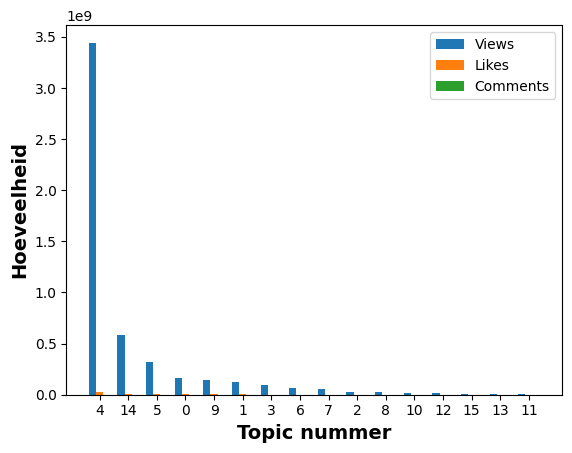

In [139]:
x_1 = grouped_1['Topic']
y_1 = grouped_1['views']
y_2 = grouped_1['likes']
y_3 = grouped_1['comment_count']


bar_width = 0.25
x = np.arange(len(grouped_1))

plt.bar(x - bar_width, y_1, width=bar_width, label='Views')
plt.bar(x, y_2, width=bar_width, label='Likes')
plt.bar(x + bar_width, y_3, width=bar_width, label='Comments')


plt.xlabel('Topic nummer', fontweight='bold',fontsize=14)
plt.ylabel('Hoeveelheid', fontweight='bold',fontsize=14)
plt.xticks(x, x_1)
plt.legend()
plt.show()

Niet overzichtelijk, dus laten we het gemiddelde nemen en weergeven per type engagement.

In [141]:
grouped_1 = grouped_1.astype({'Topic':int})

grouped_1['gem_likes'] = grouped_1['likes']/grouped_1['Count']
grouped_1['gem_views'] = grouped_1['views']/grouped_1['Count']
grouped_1['gem_comment'] = grouped_1['comment_count']/grouped_1['Count']

grouped_1 = grouped_1.sort_values(by ='gem_likes', ascending=False)
grouped_1

Topic     likes       views  comment_count  Count      gem_likes  \
0   4      31198772  3442633308  207628         183    170485.092896   
1   14     6409197   586484626   172729         85     75402.317647    
2   5      8858021   319347528   830757         240    36908.420833    
4   9      3878260   143217427   677757         261    14859.233716    
7   6      1609389   68411824    496054         152    10588.085526    
3   0      4403739   162041220   1370413        505    8720.275248     
5   1      2686978   127691515   555288         352    7633.460227     
6   3      1842888   91921178    320095         295    6247.077966     
12  12     453170    19659242    92540          75     6042.266667     
8   7      1057074   56006412    329505         205    5156.458537     
9   2      828320    28044325    220956         205    4040.585366     
11  10     709984    19919530    104374         192    3697.833333     
13  15     165053    8649311     107197         63     2619.888889     
14  13     229144    6774760     48508          90     2546.044444     
10  8      346089    26774370    64010          172    2012.145349     
15  11     86168     3070099     26850          92     936.608696      

       gem_views  gem_comment  
0   1.881220e+07  1134.579235  
1   6.899819e+06  2032.105882  
2   1.330615e+06  3461.487500  
4   5.487258e+05  2596.770115  
7   4.500778e+05  3263.513158  
3   3.208737e+05  2713.689109  
5   3.627600e+05  1577.522727  
6   3.115972e+05  1085.067797  
12  2.621232e+05  1233.866667  
8   2.732020e+05  1607.341463  
9   1.368016e+05  1077.834146  
11  1.037476e+05  543.614583   
13  1.372907e+05  1701.539683  
14  7.527511e+04  538.977778   
10  1.556649e+05  372.151163   
15  3.337064e+04  291.847826

In [235]:
grouped_2 = df.groupby('Topic', as_index=False)[['likes','views','comment_count']].median().rename(columns={'likes':'med_likes','views':'med_views','comment_count':'med_comments'})
grouped_3 = grouped_1.merge(grouped_2, on='Topic')
grouped_3 = grouped_3.astype({'Topic':str})

In [236]:
grouped_3_top = grouped_3.sort_values(by='gem_views').tail(5)

x_1 = grouped_3_top['Topic']
y_1 = grouped_3_top['gem_views']

grouped_3_top = grouped_3.sort_values(by='gem_likes').tail(5)
x_2 = grouped_3_top['Topic']
y_2 = grouped_3_top['gem_likes']

grouped_3_top = grouped_3.sort_values(by='gem_comment').tail(5)
x_3 = grouped_3_top['Topic']
y_3 = grouped_3_top['gem_comment']

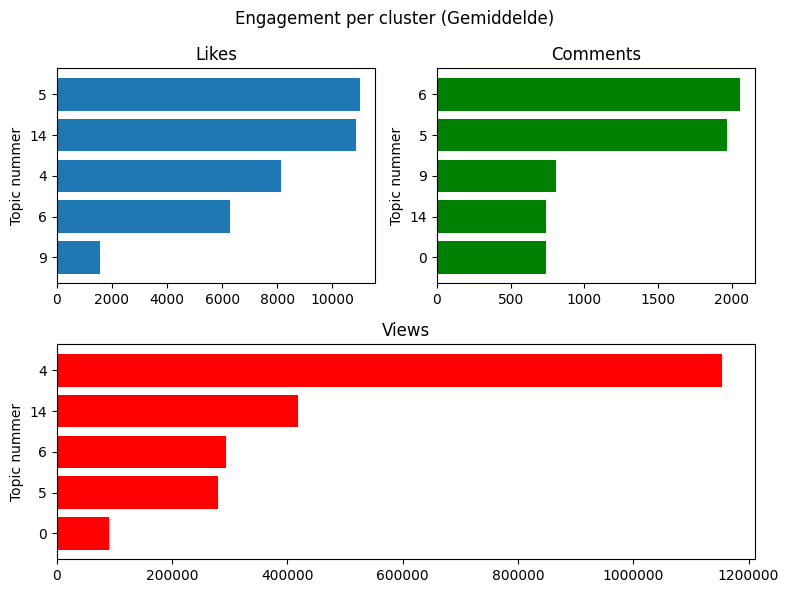

In [241]:
plt.figure(figsize=(8, 6))

plt.subplot(2,1,2)
plt.barh(x_1,y_1,color='r')
plt.ylabel("Topic nummer")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Views")

plt.subplot(2,2,1)
plt.barh(x_2,y_2)
plt.ylabel("Topic nummer")
plt.title("Likes")

plt.subplot(2,2,2)
plt.barh(x_3,y_3, color='g')
plt.ylabel("Topic nummer")
plt.title("Comments")

plt.suptitle("Engagement per cluster (Gemiddelde)")
plt.tight_layout()
plt.show()

In [238]:
grouped_3_top = grouped_3.sort_values(by='med_views').tail(5)

x_1 = grouped_3_top['Topic']
y_1 = grouped_3_top['med_views']

grouped_3_top = grouped_3.sort_values(by='med_likes').tail(5)
x_2 = grouped_3_top['Topic']
y_2 = grouped_3_top['med_likes']

grouped_3_top = grouped_3.sort_values(by='med_comments').tail(5)
x_3 = grouped_3_top['Topic']
y_3 = grouped_3_top['med_comments']

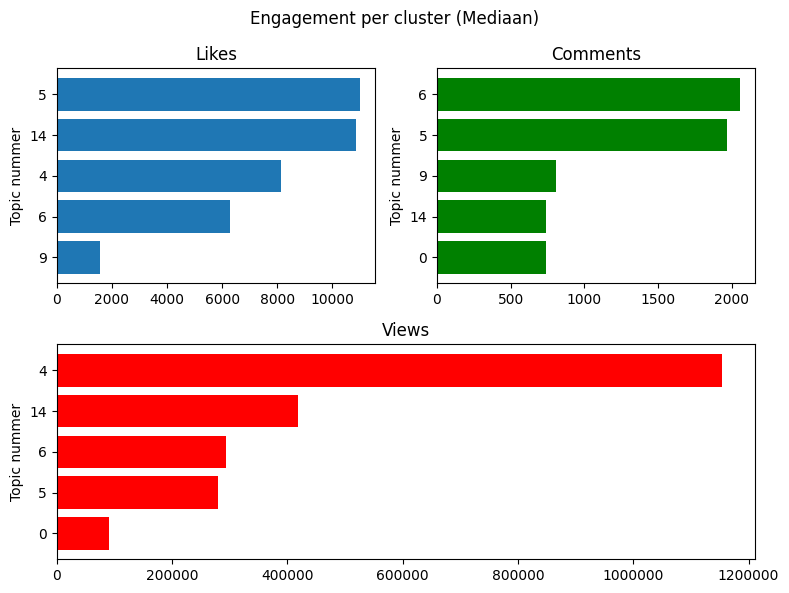

In [239]:
plt.figure(figsize=(8, 6))

plt.subplot(2,1,2)
plt.barh(x_1,y_1,color='r')
plt.ylabel("Topic nummer")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Views")

plt.subplot(2,2,1)
plt.barh(x_2,y_2)
plt.ylabel("Topic nummer")
plt.title("Likes")

plt.subplot(2,2,2)
plt.barh(x_3,y_3, color='g')
plt.ylabel("Topic nummer")
plt.title("Comments")

plt.suptitle("Engagement per cluster (Mediaan)")
plt.tight_layout()
plt.show()